<a href="https://colab.research.google.com/github/tyasenj/Pembelajaran_Mesin/blob/main/Jobsheet4_Klasifikasi/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan **fitur histogram**.

## Langkah 0 - Import Library

In [1]:
# Import Required Libraries
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Langkah 1 - Load Data dan Visualisasikan

In [2]:
# Image directories
train_dir = "/content/drive/MyDrive/Pembelajaran Mesin/images/test"
test_dir = "/content/drive/MyDrive/Pembelajaran Mesin/images/training"


In [3]:
# Fungsi untuk memuat dataset
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = cv2.imread(str(file))  # Load image using OpenCV
            if img is not None:
                img_list.append((img, label))
    return img_list

# Load training data
train_img = load_dataset(train_dir)

# Load test data
test_img = load_dataset(test_dir)

## Langkah 2 - Pra Pengolahan Data

In [4]:
# Fungsi untuk standarisasi ukuran gambar
def standarized_input(image):
    return cv2.resize(image, (1100, 600))

# Fungsi untuk encode label gambar
def label_encoder(label):
    return 1 if label == 'day' else 0

# Fungsi untuk melakukan pra-pengolahan gambar
def preprocess(img_list):
    std_img_list = []
    for img, label in img_list:
        std_img = standarized_input(img)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

# Preprocess data
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)


## Langkah 3 - Ekstraksi Fitur dengan Histogram

In [5]:
# Fungsi untuk menghitung histogram
def calc_histogram(image, bins=32):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256]).flatten()  # Red channel
    hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256]).flatten()  # Green channel
    hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256]).flatten()  # Blue channel
    hist_features = np.concatenate((hist_r, hist_g, hist_b))
    return hist_features

# Fungsi untuk ekstraksi histogram dari seluruh gambar dalam dataset
def extract_histogram_features(img_list, bins=32):
    hist_features_list = []
    labels = []
    for img, label in img_list:
        hist_features = calc_histogram(img, bins)
        hist_features_list.append(hist_features)
        labels.append(label)
    hist_df = pd.DataFrame(hist_features_list)
    hist_df['LABELS'] = labels
    return hist_df

# Ekstraksi fitur histogram pada data training
train_hist_features = extract_histogram_features(train_std_img_list, bins=32)

# Ekstraksi fitur histogram pada data testing
test_hist_features = extract_histogram_features(test_std_img_list, bins=32)


## Langkah 4 - Visualisasi Histogram Gambar Secara Acak

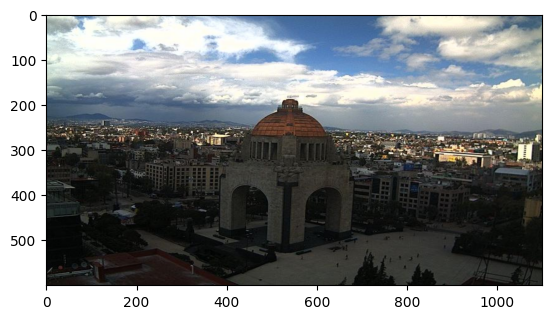

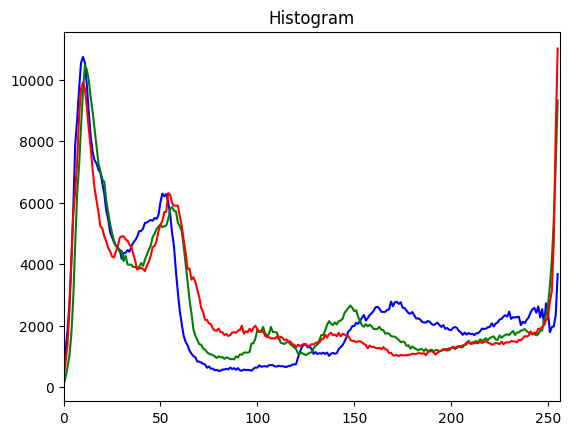

In [6]:
# Fungsi untuk memvisualisasikan histogram
def plot_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title("Histogram")
    plt.show()

# Random visualization
random_idx = np.random.randint(0, len(train_std_img_list))
random_img = train_std_img_list[random_idx][0]

# Visualisasi gambar
plt.imshow(cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB))
plt.show()

# Visualisasi histogram gambar
plot_histogram(random_img)


## Langkah 5 - Melatih Model SVM

In [7]:
# Memisahkan fitur dan label untuk training dan testing
X_train = train_hist_features.iloc[:, :-1].values
y_train = train_hist_features['LABELS'].values

X_test = test_hist_features.iloc[:, :-1].values
y_test = test_hist_features['LABELS'].values

# Membuat model SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)


SVC()

## Langkah 6 - Evaluasi Model

In [8]:
from sklearn.metrics import accuracy_score

# Prediksi pada data training
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi pada data testing
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Menampilkan hasil akurasi
print(f'Akurasi pada data training: {train_accuracy:.4f}')
print(f'Akurasi pada data testing: {test_accuracy:.4f}')


Akurasi pada data training: 0.9750
Akurasi pada data testing: 0.9292


Model SVM yang dilatih dengan fitur histogram bisa digunakan untuk membedakan gambar siang dan malam. Nilai akurasi pada data training dan testing akan memberikan gambaran seberapa baik model dapat menggeneralisasi.